In [ ]:
using GuSTO
# include("../src/GuSTO.jl")

In [123]:
robot = Car()
model = DubinsCar()
env = BlankEnv()

N = 41
x_init = 2*ones(3)
x_goal = zeros(3)
tf_guess = 5.

PD = ProblemDefinition(robot, model, env, x_init, x_goal)
TOPgusto = TrajectoryOptimizationProblem(PD, N, tf_guess, fixed_final_time=true)
TOSgusto = TrajectoryOptimizationSolution(TOPgusto)
solve_SCP!(TOSgusto, TOPgusto, solve_gusto_jump!, init_traj_straightline, "Ipopt", print_level=0)

In [124]:
# SCP Only
# TOS_SCP = TrajectoryOptimizationSolution(TOP)
# solve_SCP!(TOS_SCP, TOP, solve_gusto_cvx!, init_traj_straightline, "Gurobi", OutputFlag=0)
# solve_SCP!(TOS_SCP, TOP, solve_gusto_jump!, init_traj_straightline, "IPOPT", print_level=0)

@show TOSgusto.SCPS.converged
@show TOSgusto.SCPS.iterations
@show TOSgusto.SCPS.total_time
@show TOSgusto.SCPS.J_true[end]

(TOSgusto.SCPS).converged = true
(TOSgusto.SCPS).iterations = 11
(TOSgusto.SCPS).total_time = 0.35263006300000005
(TOSgusto.SCPS).J_true[end] = 14.710863180692739


14.710863180692739

In [125]:
@show TOSgusto.SCPS.converged
@show TOSgusto.SCPS.iterations
@show TOSgusto.SCPS.iter_elapsed_times
@show TOSgusto.SCPS.total_time
@show TOSgusto.SCPS.accept_solution
@show TOSgusto.SCPS.prob_status
@show TOSgusto.SCPS.convergence_measure
@show TOSgusto.SCPS.param.alg.ω_vec
@show TOSgusto.SCPS.param.alg.Δ_vec

(TOSgusto.SCPS).converged = true
(TOSgusto.SCPS).iterations = 11
(TOSgusto.SCPS).iter_elapsed_times = Any[0.0438044, 0.027915, 0.0447667, 0.0237506, 0.0218311, 0.059988, 0.0236411, 0.0215258, 0.0398581, 0.022872, 0.0226773]
(TOSgusto.SCPS).total_time = 0.35263006300000005
(TOSgusto.SCPS).accept_solution = Bool[true, true, true, true, true, true, true, true, true, true, true, true]
(TOSgusto.SCPS).prob_status = Union{TerminationStatusCode, Symbol}[:NA, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED]
(TOSgusto.SCPS).convergence_measure = [0.0, 1.01449, 1.61071, 0.693931, 0.600997, 0.416046, 0.236103, 0.335505, 0.365006, 0.404354, 0.246632, 0.0570542]
(((TOSgusto.SCPS).param).alg).ω_vec = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
(((TOSgusto.SCPS).param).alg).Δ_vec = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000

12-element Array{Float64,1}:
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0
 10000.0

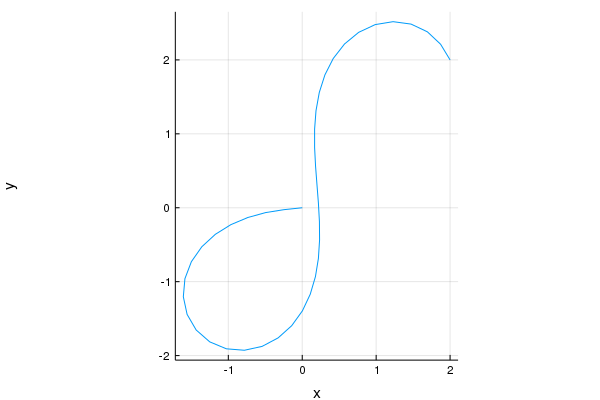

In [134]:
using Plots
gr(fmt=:png)
plot([TOSgusto.SCPS.traj.X[1,:]], [TOSgusto.SCPS.traj.X[2,:]],
    xlabel = "x",
    ylabel = "y",
    aspect_ratio = 1,
    legend = :none)

In [ ]:
TOS_SCPS  = TrajectoryOptimizationSolution(TOP)
solve_SCPshooting!(TOS_SCPS, TOP, solve_gusto_jump!, init_traj_straightline, "IPOPT", print_level=0)

@show TOS_SCPS.SS.converged
@show TOS_SCPS.SCPS.total_time